## Вычисление погрешностей и построение графиков

Оптимальный h (двойная точность): 8.369390126837382e-05
Оптимальный h (одинарная точность): 0.01273976100744773


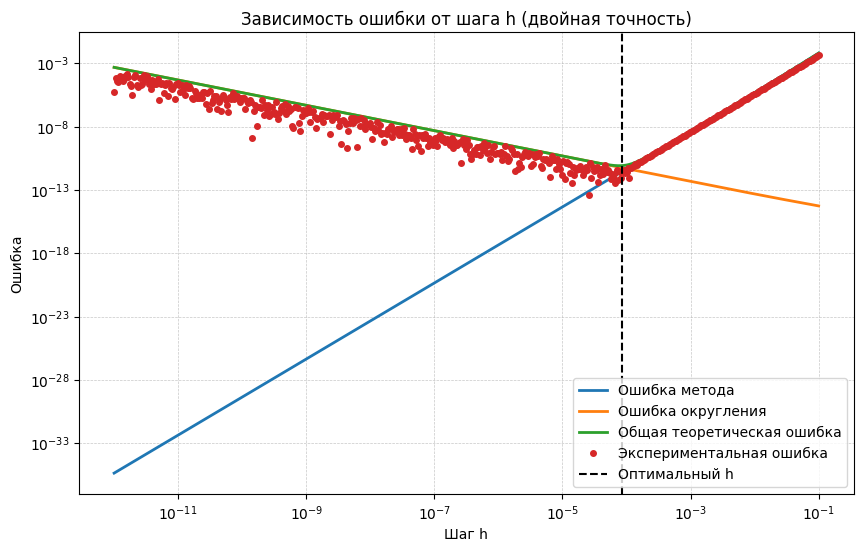

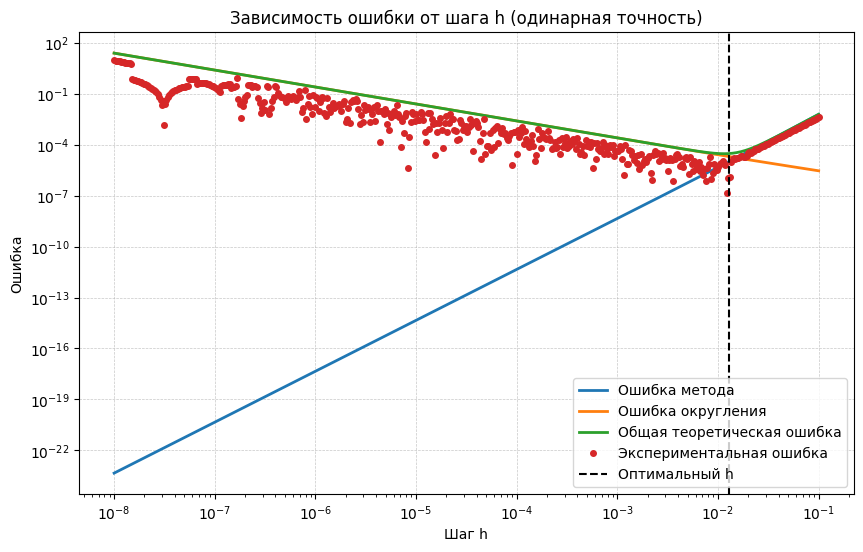

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Функция
def f(x):
    return np.cos(x)**2

# Производные
def derivative(x):
    return -2 * np.sin(x) * np.cos(x)

def second_derivative(x):
    return -2 * np.cos(2 * x)

def fourth_derivative(x):
    return 8 * np.cos(2 * x)

# Значение x0
x0 = np.pi / 8

# Значения коэффициентов
coeffs = {
    'a': 11 / 60,
    'b': 2 / 3,
    'c': -5 / 4,
    'd': 2 / 5
}

# Сумма модулей коэффициентов
sum_abs_coeffs = sum(abs(c) for c in coeffs.values())  # 5/2

# Вычисление оптимального h
def optimal_h(epsilon, f2, f4):
    return ((5 * epsilon) / (2 * (4*f2 + f4)))**(1/4)

# Вычисление ошибок
def compute_errors(h_values, x0, precision='double'): #precision : 'double' или 'single'
    eps = np.finfo(float).eps if precision == 'double' else np.finfo(np.float32).eps
    dtype = float if precision == 'double' else np.float32
    x0 = dtype(x0)
    h_values = np.array(h_values, dtype=dtype)

    E_t_list = []
    E_r_list = []
    E_total_list = []
    experimental_error = []

    for h in h_values:
        h = dtype(h)
        # Интервал для оценки максимумов производных
        x_range = np.linspace(x0 - 3*h, x0 + 2*h, 100, dtype=dtype)
        M_h = np.max(np.abs(f(x_range)))
        f2_h = np.max(np.abs(second_derivative(x_range)))
        f4_h = np.max(np.abs(fourth_derivative(x_range)))

        # Теоретическая ошибка метода
        E_t = (2 * h**3 * (4*f2_h + f4_h)) / 5
        # Ошибка округления
        E_r = (eps * M_h * sum_abs_coeffs) / h
        E_total = E_t + E_r

        E_t_list.append(E_t)
        E_r_list.append(E_r)
        E_total_list.append(E_total)

        # Экспериментальная ошибка
        f_vals = np.array([f(x0 + 2*h), f(x0 - h), f(x0 - 2*h), f(x0 - 3*h)], dtype=dtype)
        derivative_value = np.dot(list(coeffs.values()), f_vals) / h
        experimental_error.append(abs(derivative_value - derivative(x0)))

    return np.array(E_t_list), np.array(E_r_list), np.array(E_total_list), np.array(experimental_error)

# Построение графиков
def plot_errors(h_values, E_t, E_r, E_total, experimental_error, h_opt, title):
    plt.figure(figsize=(10, 6))
    plt.loglog(h_values, E_t, label='Ошибка метода', linewidth=2)
    plt.loglog(h_values, E_r, label='Ошибка округления', linewidth=2)
    plt.loglog(h_values, E_total, label='Общая теоретическая ошибка', linewidth=2)
    plt.loglog(h_values, experimental_error, 'o', label='Экспериментальная ошибка', markersize=4)
    plt.axvline(h_opt, color='k', linestyle='--', label=f'Оптимальный h')
    plt.xlabel('Шаг h')
    plt.ylabel('Ошибка')
    plt.title(title)
    plt.legend(frameon=True, fontsize=10, loc='lower right')
    plt.grid(True, which='major', linestyle='--',linewidth=0.5, alpha=0.7)
    plt.show()


# Вычисление оптимального h
f2_x0 = abs(second_derivative(x0))
f4_x0 = abs(fourth_derivative(x0))

epsilon_double = np.finfo(float).eps
epsilon_single = np.finfo(np.float32).eps

h_opt_double = optimal_h(epsilon_double, f2_x0, f4_x0)
h_opt_single = optimal_h(epsilon_single, f2_x0, f4_x0)

print(f"Оптимальный h (двойная точность): {h_opt_double}")
print(f"Оптимальный h (одинарная точность): {h_opt_single}")

# Вычисление ошибок
E_t_double, E_r_double, E_total_double, experimental_error_double = compute_errors(
    h_values_double, x0, 'double'
)
E_t_single, E_r_single, E_total_single, experimental_error_single = compute_errors(
    h_values_single, x0, 'single'
)

# Построение графиков
plot_errors(h_values_double, E_t_double, E_r_double, E_total_double, experimental_error_double, h_opt_double,
            'Зависимость ошибки от шага h (двойная точность)')
plot_errors(h_values_single, E_t_single, E_r_single, E_total_single, experimental_error_single, h_opt_single,
            'Зависимость ошибки от шага h (одинарная точность)')